In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sunspots/Sunspots.csv


In [14]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    

# **Plotting the time series Data**

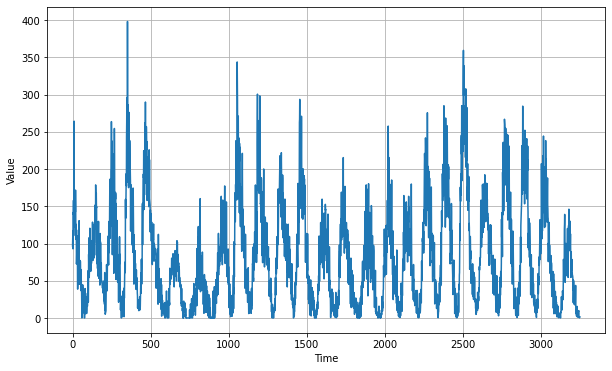

In [16]:
import csv
time_step = []
sunspots = []

with open('/kaggle/input/sunspots/Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

# Splitting test and train and setting window and batch size

In [22]:
split_time = 2800
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Creating window

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

# Forecast function

In [20]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

# Defining the model

In [21]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=700)

Epoch 1/700
28/28 [==============================] - 3s 122ms/step - loss: 44.3211 - mae: 45.1296
Epoch 2/700
28/28 [==============================] - 1s 29ms/step - loss: 25.6881 - mae: 26.1828
Epoch 3/700
28/28 [==============================] - 1s 29ms/step - loss: 22.6273 - mae: 23.1009
Epoch 4/700
28/28 [==============================] - 1s 28ms/step - loss: 21.4676 - mae: 21.9536
Epoch 5/700
28/28 [==============================] - 1s 28ms/step - loss: 20.4618 - mae: 20.9373
Epoch 6/700
28/28 [==============================] - 1s 28ms/step - loss: 19.6924 - mae: 20.1950
Epoch 7/700
28/28 [==============================] - 1s 34ms/step - loss: 19.3545 - mae: 19.8655
Epoch 8/700
28/28 [==============================] - 1s 30ms/step - loss: 19.0039 - mae: 19.5052
Epoch 9/700
28/28 [==============================] - 1s 29ms/step - loss: 19.1677 - mae: 19.6661
Epoch 10/700
28/28 [==============================] - 1s 29ms/step - loss: 18.7934 - mae: 19.3091
Epoch 11/700
28/28 [========

28/28 [==============================] - 1s 28ms/step - loss: 16.5170 - mae: 17.0252
Epoch 85/700
28/28 [==============================] - 1s 28ms/step - loss: 16.5626 - mae: 17.0446
Epoch 86/700
28/28 [==============================] - 1s 30ms/step - loss: 16.5736 - mae: 17.0696
Epoch 87/700
28/28 [==============================] - 1s 31ms/step - loss: 16.4508 - mae: 16.9190
Epoch 88/700
28/28 [==============================] - 1s 29ms/step - loss: 16.4070 - mae: 16.8777
Epoch 89/700
28/28 [==============================] - 1s 28ms/step - loss: 16.4061 - mae: 16.8864
Epoch 90/700
28/28 [==============================] - 1s 28ms/step - loss: 16.4053 - mae: 16.9246
Epoch 91/700
28/28 [==============================] - 1s 28ms/step - loss: 16.4717 - mae: 16.9669
Epoch 92/700
28/28 [==============================] - 1s 28ms/step - loss: 16.5880 - mae: 17.0821
Epoch 93/700
28/28 [==============================] - 1s 28ms/step - loss: 16.3158 - mae: 16.8138
Epoch 94/700
28/28 [=============

28/28 [==============================] - 1s 32ms/step - loss: 15.8431 - mae: 16.3403
Epoch 168/700
28/28 [==============================] - 1s 30ms/step - loss: 16.0366 - mae: 16.5107
Epoch 169/700
28/28 [==============================] - 1s 28ms/step - loss: 15.9152 - mae: 16.3783
Epoch 170/700
28/28 [==============================] - 1s 28ms/step - loss: 15.8502 - mae: 16.3580
Epoch 171/700
28/28 [==============================] - 1s 29ms/step - loss: 15.8592 - mae: 16.3305
Epoch 172/700
28/28 [==============================] - 1s 28ms/step - loss: 15.8256 - mae: 16.3091
Epoch 173/700
28/28 [==============================] - 1s 28ms/step - loss: 16.0561 - mae: 16.5616
Epoch 174/700
28/28 [==============================] - 1s 28ms/step - loss: 16.1701 - mae: 16.6521
Epoch 175/700
28/28 [==============================] - 1s 28ms/step - loss: 15.7503 - mae: 16.2456
Epoch 176/700
28/28 [==============================] - 1s 28ms/step - loss: 15.7339 - mae: 16.2249
Epoch 177/700
28/28 [===

28/28 [==============================] - 1s 28ms/step - loss: 15.6990 - mae: 16.1707
Epoch 250/700
28/28 [==============================] - 1s 27ms/step - loss: 15.6985 - mae: 16.2063
Epoch 251/700
28/28 [==============================] - 1s 30ms/step - loss: 15.4133 - mae: 15.9034
Epoch 252/700
28/28 [==============================] - 1s 28ms/step - loss: 15.4116 - mae: 15.8934
Epoch 253/700
28/28 [==============================] - 1s 28ms/step - loss: 15.5327 - mae: 16.0270
Epoch 254/700
28/28 [==============================] - 1s 29ms/step - loss: 15.8238 - mae: 16.2845
Epoch 255/700
28/28 [==============================] - 1s 28ms/step - loss: 15.5145 - mae: 16.0049
Epoch 256/700
28/28 [==============================] - 1s 27ms/step - loss: 15.4638 - mae: 15.9289
Epoch 257/700
28/28 [==============================] - 1s 27ms/step - loss: 15.4331 - mae: 15.9204
Epoch 258/700
28/28 [==============================] - 1s 29ms/step - loss: 15.4808 - mae: 15.9500
Epoch 259/700
28/28 [===

28/28 [==============================] - 1s 29ms/step - loss: 15.0780 - mae: 15.5568
Epoch 332/700
28/28 [==============================] - 1s 28ms/step - loss: 15.1078 - mae: 15.5888
Epoch 333/700
28/28 [==============================] - 1s 27ms/step - loss: 15.0698 - mae: 15.5385
Epoch 334/700
28/28 [==============================] - 1s 28ms/step - loss: 15.0941 - mae: 15.5377
Epoch 335/700
28/28 [==============================] - 1s 29ms/step - loss: 15.3531 - mae: 15.8212
Epoch 336/700
28/28 [==============================] - 1s 29ms/step - loss: 15.2282 - mae: 15.6809
Epoch 337/700
28/28 [==============================] - 1s 29ms/step - loss: 15.0236 - mae: 15.5208
Epoch 338/700
28/28 [==============================] - 1s 39ms/step - loss: 15.3416 - mae: 15.8072
Epoch 339/700
28/28 [==============================] - 1s 33ms/step - loss: 15.2163 - mae: 15.7060
Epoch 340/700
28/28 [==============================] - 1s 28ms/step - loss: 15.0039 - mae: 15.4852
Epoch 341/700
28/28 [===

28/28 [==============================] - 1s 28ms/step - loss: 14.6605 - mae: 15.1611
Epoch 414/700
28/28 [==============================] - 1s 28ms/step - loss: 14.7997 - mae: 15.2735
Epoch 415/700
28/28 [==============================] - 1s 40ms/step - loss: 14.8233 - mae: 15.3320
Epoch 416/700
28/28 [==============================] - 1s 28ms/step - loss: 14.6458 - mae: 15.1425
Epoch 417/700
28/28 [==============================] - 1s 30ms/step - loss: 14.7110 - mae: 15.2094
Epoch 418/700
28/28 [==============================] - 1s 29ms/step - loss: 14.7369 - mae: 15.2057
Epoch 419/700
28/28 [==============================] - 1s 30ms/step - loss: 14.7186 - mae: 15.2181
Epoch 420/700
28/28 [==============================] - 1s 30ms/step - loss: 14.9114 - mae: 15.3953
Epoch 421/700
28/28 [==============================] - 1s 33ms/step - loss: 14.9453 - mae: 15.3738
Epoch 422/700
28/28 [==============================] - 1s 29ms/step - loss: 14.7542 - mae: 15.2543
Epoch 423/700
28/28 [===

28/28 [==============================] - 1s 30ms/step - loss: 14.3708 - mae: 14.8428
Epoch 496/700
28/28 [==============================] - 1s 30ms/step - loss: 14.6237 - mae: 15.1373
Epoch 497/700
28/28 [==============================] - 1s 28ms/step - loss: 14.7951 - mae: 15.2900
Epoch 498/700
28/28 [==============================] - 1s 28ms/step - loss: 14.3828 - mae: 14.8504
Epoch 499/700
28/28 [==============================] - 1s 30ms/step - loss: 14.3224 - mae: 14.7976
Epoch 500/700
28/28 [==============================] - 1s 28ms/step - loss: 14.8633 - mae: 15.3536
Epoch 501/700
28/28 [==============================] - 1s 33ms/step - loss: 14.4891 - mae: 14.9624
Epoch 502/700
28/28 [==============================] - 1s 28ms/step - loss: 14.4735 - mae: 14.9855
Epoch 503/700
28/28 [==============================] - 1s 28ms/step - loss: 14.2975 - mae: 14.7785
Epoch 504/700
28/28 [==============================] - 1s 27ms/step - loss: 14.2555 - mae: 14.7199
Epoch 505/700
28/28 [===

28/28 [==============================] - 1s 28ms/step - loss: 14.0976 - mae: 14.5829
Epoch 578/700
28/28 [==============================] - 1s 28ms/step - loss: 14.4814 - mae: 14.9452
Epoch 579/700
28/28 [==============================] - 1s 31ms/step - loss: 14.2166 - mae: 14.7065
Epoch 580/700
28/28 [==============================] - 1s 30ms/step - loss: 14.0115 - mae: 14.4956
Epoch 581/700
28/28 [==============================] - 1s 27ms/step - loss: 13.9569 - mae: 14.4300
Epoch 582/700
28/28 [==============================] - 1s 30ms/step - loss: 13.9639 - mae: 14.4426
Epoch 583/700
28/28 [==============================] - 1s 30ms/step - loss: 14.0429 - mae: 14.5275
Epoch 584/700
28/28 [==============================] - 1s 29ms/step - loss: 14.0949 - mae: 14.5788
Epoch 585/700
28/28 [==============================] - 1s 27ms/step - loss: 14.2091 - mae: 14.6988
Epoch 586/700
28/28 [==============================] - 1s 29ms/step - loss: 14.3595 - mae: 14.8464
Epoch 587/700
28/28 [===

28/28 [==============================] - 1s 29ms/step - loss: 13.6377 - mae: 14.1302
Epoch 660/700
28/28 [==============================] - 1s 28ms/step - loss: 13.8464 - mae: 14.3444
Epoch 661/700
28/28 [==============================] - 1s 28ms/step - loss: 13.6956 - mae: 14.1949
Epoch 662/700
28/28 [==============================] - 1s 28ms/step - loss: 13.7194 - mae: 14.2041
Epoch 663/700
28/28 [==============================] - 1s 29ms/step - loss: 13.5869 - mae: 14.0629
Epoch 664/700
28/28 [==============================] - 1s 30ms/step - loss: 13.9610 - mae: 14.4315
Epoch 665/700
28/28 [==============================] - 1s 29ms/step - loss: 13.8128 - mae: 14.2702
Epoch 666/700
28/28 [==============================] - 1s 28ms/step - loss: 13.6167 - mae: 14.0795
Epoch 667/700
28/28 [==============================] - 1s 28ms/step - loss: 15.0880 - mae: 15.5922
Epoch 668/700
28/28 [==============================] - 1s 28ms/step - loss: 13.7157 - mae: 14.1865
Epoch 669/700
28/28 [===

In [23]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

# Plotting the forecast

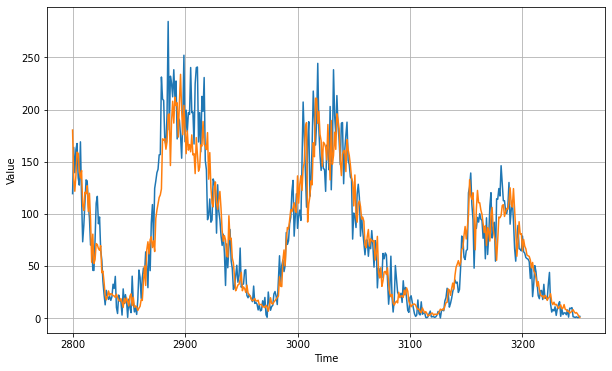

In [24]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [25]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

17.724533

# Plotting Loss vs Epochs

<Figure size 432x288 with 0 Axes>

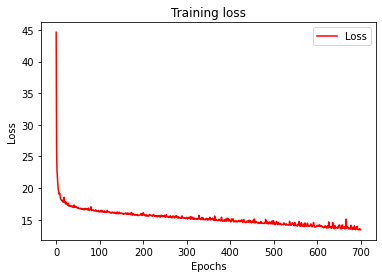

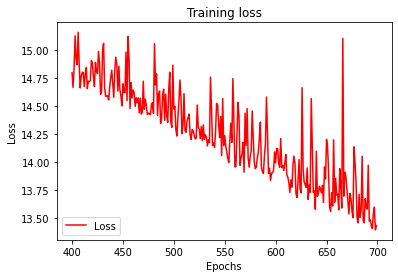

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
epochs=range(len(loss))
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()

zoomed_loss = loss[400:]
zoomed_epochs = range(400,700)
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

# Forecasted values

In [27]:
print(rnn_forecast)

[180.30927    133.47433    121.6043     136.9384     159.09953
 157.88972    140.40468    134.25557    141.50372    107.75751
 103.17256    120.55039    119.28121    126.84884    102.19199
 119.66735     94.15677     53.451485    80.42486     52.274906
  56.113922    71.37515     70.4276      66.58529     64.92239
  69.306145    43.47415     44.948586    34.411133    21.916162
  17.38832     20.31762     25.927908    21.594406    23.29973
  23.06242     21.44068     21.168417    19.705719    22.820478
  19.762712    17.108028    16.077978    18.527096    14.959436
  10.133064    18.845945    14.528936    19.283688    15.973663
  11.5111885   20.969189    23.122805    11.890453    19.942957
  10.285955    11.556393    10.621828     7.220727     9.418636
  11.130089    17.524904    16.802675    34.408783    49.914093
  31.19784     65.50932     73.1072      61.488895    75.26536
  77.945885    67.569145    74.06442     63.750996    95.41665
 103.38535    109.652534   115.63674    118.084